
# Mini Proyecto: Evaluación de Clasificadores

Este notebook implementa las tareas necesarias para abordar el mini proyecto, incluyendo:

1. **Cargar los datos.**
2. **Diagnóstico de datos (estadística descriptiva y valores faltantes).**
3. **Imputación de datos faltantes.**
4. **Generación de gráficos relevantes.**
5. **Normalización o escalamiento de datos.**
6. **División en conjuntos de entrenamiento y testeo.**
7. **Entrenamiento y evaluación de modelos clasificadores.**

**Base seleccionada:** Opción 1 - Base Estelar.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

Se utilizara en el proyecto  la base de datos estrellas Variables, ya que contiene una gran cantidad de registros. Cuantos más registros tiene una base de datos, más confiable, precisa y útil es para realizar análisis estadísticos, desarrollar modelos predictivos y tomar decisiones basadas en datos. Sin embargo, la calidad de los datos también es crucial: más registros no ayudan si los datos son incompletos, incorrectos o irrelevantes.

In [16]:

def lee_base(directorio,muestra,cantidad,columnas):
    datos=pd.read_csv(directorio,delimiter=";") #esta parte lee la base de datos
    datos=datos[columnas] # esta parte extrae las columnas requeridas
    # Si `muestra` es False, limitar el DataFrame a las primeras `cantidad` filas
    if not muestra:
        datos = datos.iloc[:cantidad, :]    
    return datos


def diagnostico_estadistico(df, 
                           variables, 
                           calcular_media=True, 
                           calcular_desviacion=True, 
                           calcular_valores_perdidos=True, 
                           calcular_max=True, 
                           calcular_min=True):
    """
    Realiza un diagnóstico de estadística descriptiva y datos faltantes para las variables especificadas.

    Parámetros:
    - df (pd.DataFrame): DataFrame que contiene los datos.
    - variables (list): Lista de nombres de las columnas a analizar.
    - calcular_media (bool): Si es True, calcula la media.
    - calcular_desviacion (bool): Si es True, calcula la desviación estándar.
    - calcular_valores_perdidos (bool): Si es True, calcula la cantidad de valores perdidos.
    - calcular_max (bool): Si es True, calcula el valor máximo.
    - calcular_min (bool): Si es True, calcula el valor mínimo.

    Retorna:
    - pd.DataFrame: DataFrame con las estadísticas calculadas.
    """
    
    # Verificar que las variables existan en el DataFrame
    for var in variables:
        if var not in df.columns:
            raise ValueError(f"La variable '{var}' no se encuentra en el DataFrame.")
    
    # Inicializar un diccionario para almacenar los resultados
    resultados = {'Variable': variables}
    
    # Calcular cada estadística según los argumentos
    if calcular_media:
        resultados['Media'] = df[variables].mean()
    if calcular_desviacion:
        resultados['Desviación Estándar'] = df[variables].std()
    if calcular_valores_perdidos:
        resultados['Valores Perdidos'] = df[variables].isnull().sum()
    if calcular_max:
        resultados['Valor Máximo'] = df[variables].max()
    if calcular_min:
        resultados['Valor Mínimo'] = df[variables].min()
    
    # Convertir el diccionario a un DataFrame
    diagnostico_df = pd.DataFrame(resultados)
    return diagnostico_df




def impute_data(dataframe, descriptors, strategies): 
    #strategies puede contener
    #"mean": Rellena con la media.
    #"median": Rellena con la mediana.
    #"most_frequent": Rellena con el valor más frecuente.
    #"constant": Rellena con un valor constante (por defecto, 0).

    if len(descriptors) != len(strategies):
        raise ValueError("Deben ser del mismo largo")

    imputed_df = dataframe.copy()
    for descriptor, strategy in zip(descriptors, strategies):
        # Imputation
        imputer = SimpleImputer(strategy=strategy, fill_value=0 if strategy == "constant" else None)
        imputed_df[descriptor] = imputer.fit_transform(imputed_df[[descriptor]])

    return imputed_df



Se crea la función que permita cargar la base de datos
1- un string con el nombre del directorio donde se encuetre la base de datos
2- una variable booleana que indique si se trabajará con una muestra o con la base de datos completa
3- un argumento que reciba las columnas con las que se pueda trabajar en una lista


In [17]:

directorio="Gaia_NaN.csv" # esto considera que el script está en la misma carpeta que el archivo CSV
muestra=True
cantidad=10
columnas=['ID', 'Class', 'N', 'Amplitude', 'Rcs', 'Meanvariance',
       'Autocor_length', 'SlottedA_length', 'Con', 'SmallKurtosis', 'Std',
       'Skew', 'MaxSlope', 'MedianAbsDev', 'MedianBRP', 'PairSlopeTrend',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'PercentDifferenceFluxPercentile',
       'PercentAmplitude', 'LinearTrend', 'Eta_e', 'Mean', 'Q31',
       'AndersonDarling', 'PeriodLS', 'Period_fit', 'Psi_CS', 'Psi_eta',
       'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1',
       'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq3_harmonics_amplitude_0', 'Freq3_harmonics_amplitude_1',
       'Freq3_harmonics_amplitude_2', 'Freq3_harmonics_amplitude_3',
       'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_rel_phase_0', 'Freq2_harmonics_rel_phase_1',
       'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3',
       'Freq3_harmonics_rel_phase_0', 'Freq3_harmonics_rel_phase_1',
       'Freq3_harmonics_rel_phase_2', 'Freq3_harmonics_rel_phase_3']

base_datos=lee_base(directorio,True,10,columnas)


    

    Muestra el resultado del codigo con las primeras 5 filas cargadas y sus respectivas columnas

In [18]:
base_datos.head()


,ID,Class,N,Amplitude,Rcs,Meanvariance,Autocor_length,SlottedA_length,Con,SmallKurtosis,Std,Skew,MaxSlope,MedianAbsDev,MedianBRP,PairSlopeTrend,FluxPercentileRatioMid20,FluxPercentileRatioMid35,FluxPercentileRatioMid50,FluxPercentileRatioMid65,FluxPercentileRatioMid80,PercentDifferenceFluxPercentile,PercentAmplitude,LinearTrend,Eta_e,Mean,Q31,AndersonDarling,PeriodLS,Period_fit,Psi_CS,Psi_eta,Freq1_harmonics_amplitude_0,Freq1_harmonics_amplitude_1,Freq1_harmonics_amplitude_2,Freq1_harmonics_amplitude_3,Freq2_harmonics_amplitude_0,Freq2_harmonics_amplitude_1,Freq2_harmonics_amplitude_2,Freq2_harmonics_amplitude_3,Freq3_harmonics_amplitude_0,Freq3_harmonics_amplitude_1,Freq3_harmonics_amplitude_2,Freq3_harmonics_amplitude_3,Freq1_harmonics_rel_phase_0,Freq1_harmonics_rel_phase_1,Freq1_harmonics_rel_phase_2,Freq1_harmonics_rel_phase_3,Freq2_harmonics_rel_phase_0,Freq2_harmonics_rel_phase_1,Freq2_harmonics_rel_phase_2,Freq2_harmonics_rel_phase_3,Freq3_harmonics_rel_phase_0,Freq3_harmonics_rel_phase_1,Freq3_harmonics_rel_phase_2,Freq3_harmonics_rel_phase_3
0,2128919424960482176,MIRA_SR,25.0,1.416432,0.949482,3.0,0.000000,5.442293,0.243054,0.462373,0.653511,0.761790,0.924793,1.328054,0.227566,0.127800,0.149937,0.0,-0.671567,-0.500114,-0.461471,0.209716,0.155465,0.058840,0.069106,0.0,1.670704,0.463136,-0.527479,0.162085,0.070223,0.054550,0.114369,0.0,-1.198392,-0.231313,0.531941,-0.002348,0.292530,12.293055,0.075789,0.893634,0.160000,0.000000,0.126656,0.216018,268.331543,0.025528,0.304804,0.310355,1.784879,0.304804,0.011895,19.899170,-1.266215,0.931676
1,5610570552491688320,RRAB,34.0,0.443386,1.000000,1.0,0.000000,12042.752633,0.162446,0.231268,0.517775,0.720122,0.836798,0.334641,0.191432,0.083991,0.102430,0.0,-2.404705,-2.441595,NaN,0.100176,0.009931,0.039059,0.008672,0.0,0.315867,-0.238308,-1.779410,0.073547,0.038331,0.048823,0.066235,0.0,-1.029503,-0.689815,-2.039551,-0.000244,5.107898,16.212751,0.017556,0.083807,0.529412,0.166667,0.049459,0.047738,0.508910,0.012390,0.309458,0.519645,0.397205,0.258203,-0.962335,0.147949,-0.183573,0.284637
2,5610983311725261312,MIRA_SR,35.0,0.170099,0.875986,4.0,0.030303,137.020266,0.033964,0.208724,0.378623,0.501416,0.869956,0.125793,0.040363,0.024076,0.068313,0.0,-0.341128,1.739659,0.241005,0.067633,0.024955,0.018870,0.017202,0.0,-0.455855,1.108598,2.477876,0.032517,0.011706,0.011973,0.003871,0.0,-1.091787,-0.945552,1.129752,0.000291,0.207083,12.744269,0.006985,0.057901,0.314286,-0.033333,0.015729,0.025171,8.742769,0.040022,0.342646,0.700200,0.119849,0.368936,0.472161,0.147949,0.064528,0.089020
3,5611101307371763328,MIRA_SR,34.0,1.350858,0.999869,4.0,0.000000,23.583559,0.259476,0.593270,0.613808,0.817245,0.943033,1.246446,0.553513,0.581996,0.667632,0.0,2.948634,2.045702,2.300415,1.219819,0.466211,0.588149,0.373113,0.0,0.376053,-0.386629,-0.546585,0.672413,0.333181,0.514404,0.176437,0.0,1.241731,-0.354125,-0.614434,-0.000392,0.914075,12.594956,0.073562,0.862775,0.176471,0.433333,0.113807,0.207843,379.949707,0.000843,0.349687,0.285682,1.867060,0.349687,-0.047072,23.597900,-1.454570,0.926506
4,4654706786001108096,MIRA_SR,28.0,0.248472,0.999947,3.0,0.000000,125.486491,0.202240,0.448444,0.565120,0.606539,0.840512,0.194339,0.060180,0.026648,0.016748,0.0,1.111026,0.470957,1.011684,0.063499,0.007737,0.009043,0.010401,0.0,-0.131892,-1.094066,0.020685,0.035019,0.010234,0.017416,0.010902,0.0,0.748489,0.421646,-0.621606,0.000304,0.270511,15.467074,0.009915,0.081736,0.321429,0.166667,0.025682,0.031900,318.427795,0.022169,0.247451,0.578087,0.273482,0.247451,0.594605,0.147949,-0.689124,0.153349


Muestra el tipo de registro para cada columna

In [19]:
base_datos.dtypes

ID                                   int64
Class                               object
N                                  float64
Amplitude                          float64
Rcs                                float64
Meanvariance                       float64
Autocor_length                     float64
SlottedA_length                    float64
Con                                float64
SmallKurtosis                      float64
Std                                float64
Skew                               float64
MaxSlope                           float64
MedianAbsDev                       float64
MedianBRP                          float64
PairSlopeTrend                     float64
FluxPercentileRatioMid20           float64
FluxPercentileRatioMid35           float64
FluxPercentileRatioMid50           float64
FluxPercentileRatioMid65           float64
FluxPercentileRatioMid80           float64
PercentDifferenceFluxPercentile    float64
PercentAmplitude                   float64
LinearTrend

El siguiente codigo nos muestra un diagnóstico de estadística descriptiva y de datos faltantes, tgambien podemos observar medidas estadisticas como la media, desviacion estandar, valores máximos y valores minimos.

In [20]:
diagnostico = diagnostico_estadistico(base_datos, 
                                     ['N','Amplitude', 'Rcs', 'Meanvariance',
       'Autocor_length', 'SlottedA_length', 'Con', 'SmallKurtosis', 'Std',
       'Skew', 'MaxSlope', 'MedianAbsDev', 'MedianBRP', 'PairSlopeTrend',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'PercentDifferenceFluxPercentile',
       'PercentAmplitude', 'LinearTrend', 'Eta_e', 'Mean', 'Q31',
       'AndersonDarling', 'PeriodLS', 'Period_fit', 'Psi_CS', 'Psi_eta',
       'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1',
       'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq3_harmonics_amplitude_0', 'Freq3_harmonics_amplitude_1',
       'Freq3_harmonics_amplitude_2', 'Freq3_harmonics_amplitude_3',
       'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_rel_phase_0', 'Freq2_harmonics_rel_phase_1',
       'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3',
       'Freq3_harmonics_rel_phase_0', 'Freq3_harmonics_rel_phase_1',
       'Freq3_harmonics_rel_phase_2', 'Freq3_harmonics_rel_phase_3'], 
                                     calcular_media=True, 
                                     calcular_valores_perdidos=True, 
                                     calcular_desviacion=True, 
                                     calcular_max=True, 
                                     calcular_min=True)
diagnostico


,Variable,Media,Desviación Estándar,Valores Perdidos,Valor Máximo,Valor Mínimo
N,N,32.695692,1.295064e+01,165,2.420000e+02,20.000000
Amplitude,Amplitude,0.356176,2.716570e-01,169,3.452071e+00,0.050792
Rcs,Rcs,0.937297,1.420770e-01,174,1.000000e+00,0.110900
Meanvariance,Meanvariance,2.062129,1.580114e+00,167,3.400000e+01,1.000000
Autocor_length,Autocor_length,0.001212,7.241889e-03,171,1.250000e-01,0.000000
SlottedA_length,SlottedA_length,28978.080911,3.306361e+06,180,1.459391e+09,0.389065
Con,Con,0.206498,1.120873e-01,174,9.129618e-01,0.001687
SmallKurtosis,SmallKurtosis,0.355256,1.426046e-01,183,9.690890e-01,0.003167
Std,Std,0.512036,1.516325e-01,190,9.813423e-01,0.006041
Skew,Skew,0.673294,1.432140e-01,177,9.942955e-01,0.012819


Imputación los datos perdidos, Generación de una función que recibe una lista de
descriptores, el dataframe original y una lista con las estrategias de imputación de cada descriptor.
¿Como cambió la distribución de los datos con la imputación realizada?
Se puede ver que la desviacion estandar y los valores límites pueden variar dependiendo el método de inputación que se aplique

In [21]:
datos_limpiados=impute_data(base_datos, ['N',"Amplitude"],["most_frequent","most_frequent"]) # se utiliza método de inputación a modo de ejemplo como el valor más frecuente

diagnostico_N_sin_filtrar=diagnostico_estadistico(base_datos,["N","Amplitude"],calcular_media=True, 
                                     calcular_valores_perdidos=True, 
                                     calcular_desviacion=True, 
                                     calcular_max=True, 
                                     calcular_min=True)
diagnostico_N_filtrado = diagnostico_estadistico(datos_limpiados,["N","Amplitude"],calcular_media=True, 
                                     calcular_valores_perdidos=True, 
                                     calcular_desviacion=True, 
                                     calcular_max=True, 
                                     calcular_min=True)

 
display(diagnostico_N_filtrado,'filtrado') 
display(diagnostico_N_sin_filtrar,'sin_filtrar')



,Variable,Media,Desviación Estándar,Valores Perdidos,Valor Máximo,Valor Mínimo
N,N,32.690186,12.946733,0,242.000000,20.000000
Amplitude,Amplitude,0.356286,0.271569,0,3.452071,0.050792


'filtrado'

,Variable,Media,Desviación Estándar,Valores Perdidos,Valor Máximo,Valor Mínimo
N,N,32.695692,12.950636,165,242.000000,20.000000
Amplitude,Amplitude,0.356176,0.271657,169,3.452071,0.050792


'sin_filtrar'

Generar dos plots para describir la cantidad de registros ( mientras más registros mejor la estadística )
El segundo plot explica la amplitud de la intensidad de estrella , expica que las estrellas MIRA_SR tienen máximos mayores que las demás estrellas,
Haciendo un poco de investigación hace concordancia porque son estrellas grandes rojas con alta amplitud y periodos largos

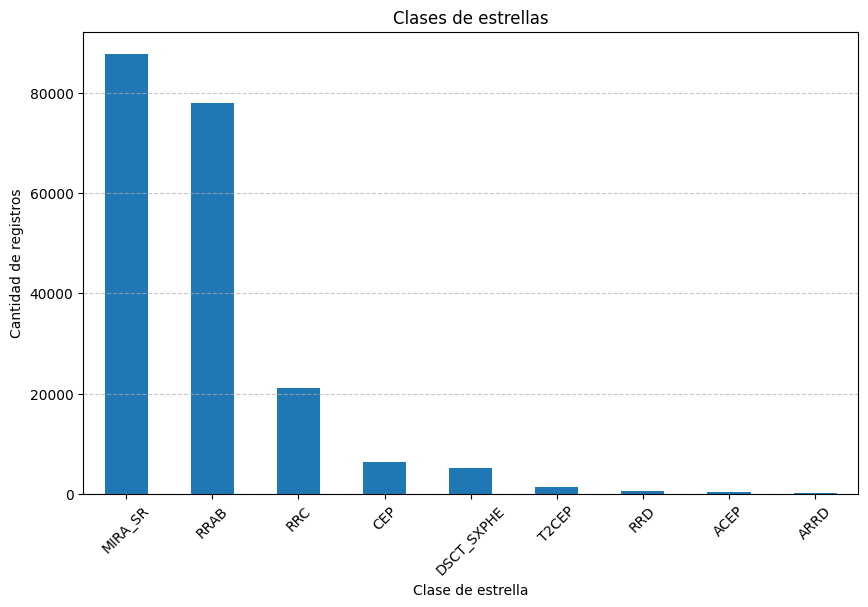

C:\Users\ignac\AppData\Local\Temp\ipykernel_11880\3144452350.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Amplitude', data=base_datos, palette='Set2')


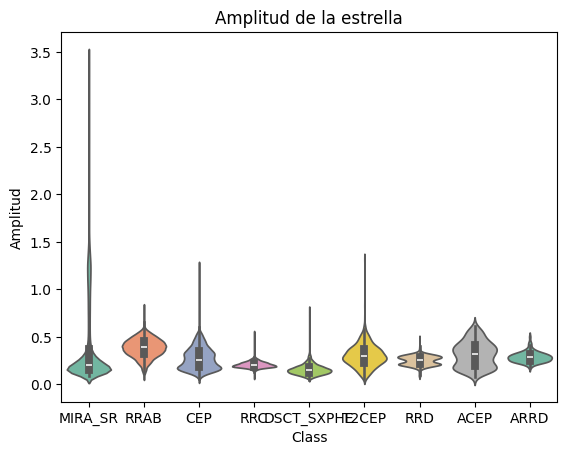

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



class_counts = base_datos['Class'].value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Clases de estrellas')
plt.xlabel('Clase de estrella')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 5: Plot the cleaned data using a violin plot
sns.violinplot(x='Class', y='Amplitude', data=base_datos, palette='Set2')
plt.title('Amplitud de la estrella')
plt.xlabel('Class')
plt.ylabel('Amplitud')
plt.show()


Función que permite hacer scatter plots y/o box plots para dos descriptores de datos. La
función recibir como argumento dos variables, y el tipo de gráfico que se desea obtener.
La función recibe como argumento la decisión de visualizar o guardar los gráficos realizados.


<Figure size 1000x600 with 0 Axes>

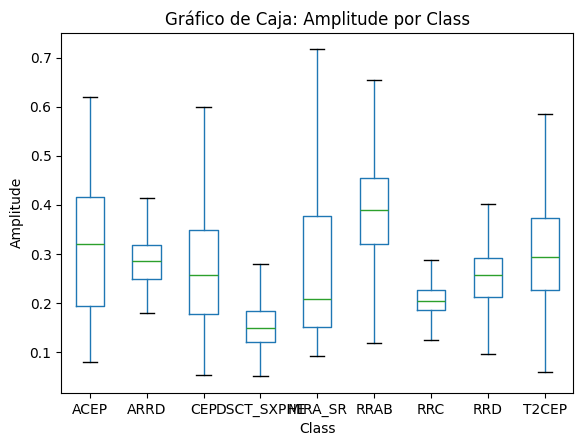

<Figure size 1000x600 with 0 Axes>

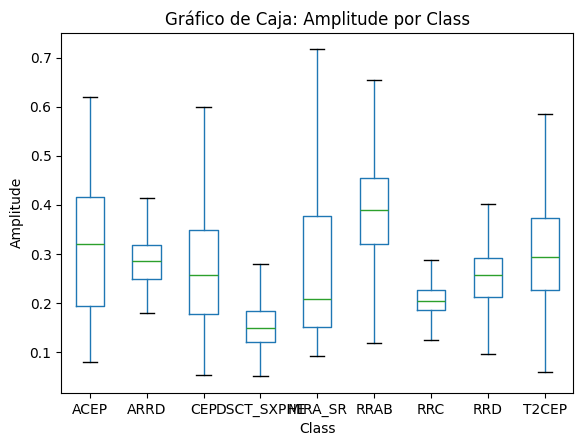

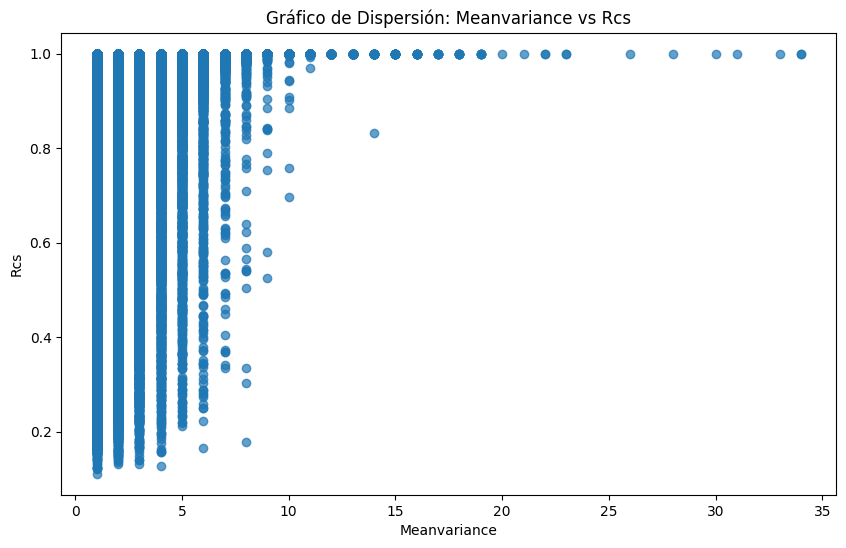

<Figure size 1000x600 with 0 Axes>

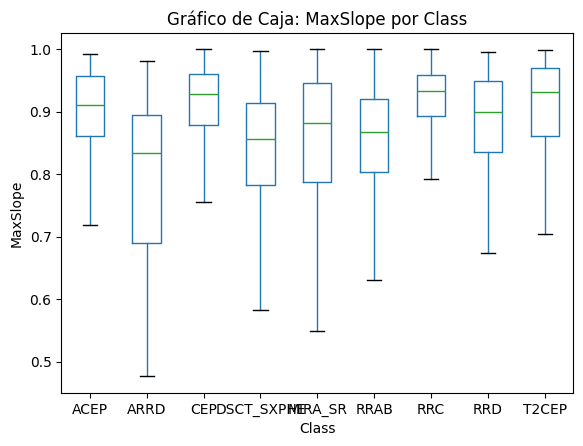

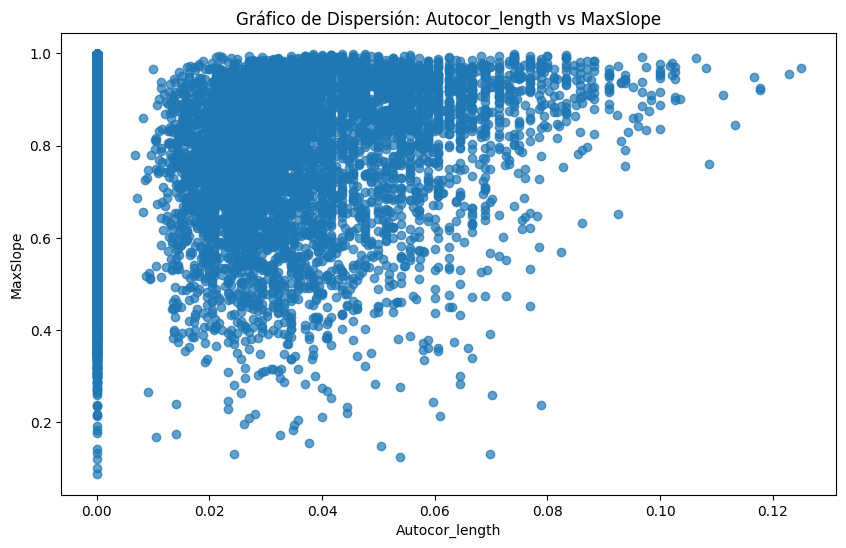

In [29]:
import os
import matplotlib.pyplot as plt

def custom_plot(data, var1, var2, plot_type='scatter', save=False, file_name='plot.png', output_dir='plots'):
    """
    Crea gráficos de dispersión (scatter plots) o gráficos de caja (box plots) para dos variables específicas
    de un conjunto de datos.

    Parámetros:
    - data: DataFrame que contiene los datos.
    - var1: La primera variable (eje x en scatter o categorías en box plot).
    - var2: La segunda variable (eje y en scatter o valores en box plot).
    - plot_type: Tipo de gráfico a generar: 'scatter' (dispersión) o 'box' (caja).
    - save: Booleano que indica si se debe guardar el gráfico como un archivo.
    - file_name: Nombre del archivo donde se guardará el gráfico, si `save=True`.
    - output_dir: Directorio donde se guardará el archivo, si `save=True`.

    Funcionalidad:
    - Si `plot_type` es 'scatter', se genera un gráfico de dispersión con `var1` en el eje x y `var2` en el eje y.
    - Si `plot_type` es 'box', se genera un gráfico de caja con `var1` como categorías y `var2` como valores.
    - Si `save` es `True`, el gráfico se guarda en el directorio especificado con el nombre dado en `file_name`.
    - Si `save` es `False`, el gráfico se muestra en pantalla.

    Ejemplo de uso:
    custom_plot(data, var1='Class', var2='Amplitude', plot_type='box', save=True, file_name='amplitude_boxplot.png')
    """
    plt.figure(figsize=(10, 6))
    if plot_type == 'scatter':
        plt.scatter(data[var1], data[var2], alpha=0.7)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title(f'Gráfico de Dispersión: {var1} vs {var2}')
        plt.suptitle('')  # Elimina el título predeterminado en boxplot

    elif plot_type == 'box':
         data.boxplot(column=var2, by=var1, grid=False, showfliers=False)
         plt.xlabel(var1)
         plt.ylabel(var2)
         plt.title(f'Gráfico de Caja: {var2} por {var1}')
         plt.suptitle('')  # Elimina el título predeterminado en boxplot

    if save:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, file_name))
    else:
        plt.show()
custom_plot(base_datos, var1='Class', var2='Amplitude', plot_type='box', save=False)
custom_plot(base_datos, var1='Class', var2='Amplitude', plot_type='box', save=True, file_name='amplitude_boxplot.png')
custom_plot(base_datos, var1='Meanvariance', var2='Rcs', plot_type='scatter', save=True)
custom_plot(base_datos, var1='Class', var2='MaxSlope', plot_type='box', save=True, file_name='Maxslope_boxplot.png')
custom_plot(base_datos, var1='Autocor_length', var2='MaxSlope', plot_type='scatter', save=True, file_name='autocor_maxslope_Scatter.png')




En la siguiente función se aplica el Metodo de Normalización z o escalamiento de datos, nos preguntamos ¿Qué es la normalización Z?
Es un método para escalar los datos y que todos tengan un comportamiento similar, sin importar si los valores originales son grandes o pequeños. Esto se hace restando la media y dividiendo por la desviación estándar de los datos

Text(0.5, 1.0, 'Rcs')

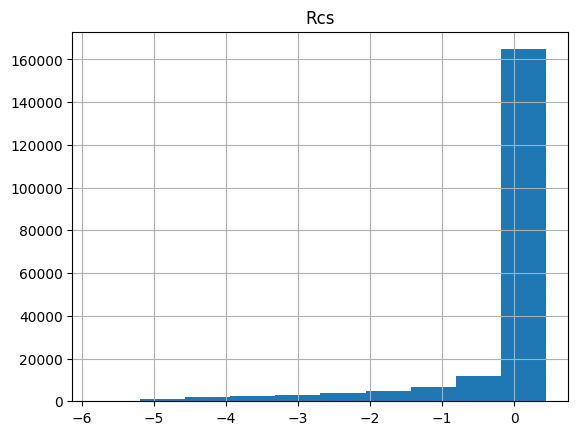

In [24]:
def apply_manual_z_scaling(data, scaling_strategy):
    """
    Aplica normalización Z de forma explícita (utilizando fórmula de Z-score) o escalamiento Min-Max a las columnas.

    Normalización Z (Z-score): Z = (X - mean) / std

    Parámetros:
    - data: DataFrame que contiene los datos a transformar.
    - scaling_strategy: Diccionario donde las claves son los nombres de las columnas y los valores
                        son las estrategias ('z' para normalización Z o 'minmax' para escalamiento Min-Max).

    Retorna:
    - DataFrame modificado con las transformaciones aplicadas.
    """
    modified_data = pd.DataFrame(index=data.index)
    for column, strategy in scaling_strategy.items():
        if column in data.columns:
            if strategy == 'z':
                mean = data[column].mean()
                std = data[column].std()
                modified_data[column] = (data[column] - mean) / std  # Normalización Z explicita
            elif strategy == 'minmax':
                min_val = data[column].min()
                max_val = data[column].max()
                modified_data[column] = (data[column] - min_val) / (max_val - min_val)  # Escalamiento Min-Max
            else:
                raise ValueError(f"Estrategia no válida para la columna {column}: {strategy}")
        else:
            raise KeyError(f"La columna {column} no existe en los datos.")
    return modified_data


scaling_strategy = {
    'Amplitude': 'z',
    'Rcs': 'z',
    'Meanvariance': 'z',
    'SmallKurtosis': 'z',
    'PercentAmplitude': 'z'
}

# Aplicar la función ajustada a los datos
scaled_data_manual_z = apply_manual_z_scaling(base_datos, scaling_strategy)
scaled_data_with_class = scaled_data_manual_z.copy()
scaled_data_with_class['Class'] = base_datos['Class']

# Mostrar los datos escalados
scaled_data_with_class["Rcs"].hist()
plt.title("Rcs")

Generación de sets de entrenamiento y testeo, Esta instrucción se refiere al proceso de dividir los datos en conjuntos de entrenamiento y prueba de una manera que garantice que la distribución de las clases (o categorías) sea similar en ambos conjuntos.
test_size: Porcentaje de datos que irán al set de testeo (por defecto, 0.2)
random_state=42 (en este caso utilizamos 42) #RANDOM STATE ES VALOR SEMILLA

In [ ]:
from sklearn.model_selection import train_test_split

def stratified_split(data, target_column, test_size=0.2, random_state=42):
    """
    Genera sets de entrenamiento y testeo con separación estratificada.

    Parámetros:
    - data: DataFrame que contiene los datos completos.
    - target_column: Nombre de la columna que se usará como referencia para la estratificación.
    - test_size: Porcentaje de datos que irán al set de testeo (por defecto, 0.2).
    - random_state: Semilla para asegurar la reproducibilidad.

    Retorna:
    - train_set: DataFrame correspondiente al set de entrenamiento.
    - test_set: DataFrame correspondiente al set de testeo.
    """
    train_set, test_set = train_test_split(
        data, 
        test_size=test_size, 
        stratify=data[target_column], 
        random_state=random_state
    )
    return train_set, test_set

# Aplicar la función a los datos normalizados/escalados, usando 'Class' como columna de estratificación

# Eliminar filas con valores faltantes (NaN)
cleaned_data = scaled_data_with_class.dropna()

# Reintentar la separación estratificada con los datos limpios
train_set, test_set = stratified_split(cleaned_data, target_column='Class', test_size=0.2, random_state=42) #RANDOM STATE ES VALOR SEMILLA

# Mostrar un resumen de los tamaños de los conjuntos
train_set_summary = {
    'Conjunto': ['Entrenamiento', 'Testeo'],
    'Tamaño': [len(train_set), len(test_set)]
}


len(train_set), len(test_set)



(159661, 39916)

Consolidación de todas las funciones en una clase (incluimos clasificadores naive Bayes (desde sklearn.naive bayes.GaussianNB y regresión logística (desde sklearn.linear model.LogisticRegression )) Esta clase tiene por nombre preprocesamiento. Algunos de los parámetros que se usan en las funciones antes creadas pueden son entregadas en la inicialización de la clase. se Agrega una funciónn que aplica todo el procesamiento, denominado función ejecutar procesamiento.

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import joblib

class Preprocesamiento:
    def __init__(self, scaling_strategy=None, test_size=0.2, random_state=42):
        """
        Inicializa la clase Preprocesamiento.

        Parámetros:
        - scaling_strategy: Diccionario con estrategias de escalamiento ('z' o 'minmax').
        - test_size: Proporción del conjunto de datos para el testeo.
        - random_state: Semilla para reproducibilidad.
        """
        self.scaling_strategy = scaling_strategy
        self.test_size = test_size
        self.random_state = random_state

    def lee_base(self, directorio, muestra, cantidad, columnas):
        """
        Lee y filtra un archivo CSV.
        """
        datos = pd.read_csv(directorio, delimiter=";")
        datos = datos[columnas]
        if not muestra:
            datos = datos.iloc[:cantidad, :]
        return datos

    def diagnostico_estadistico(self, df, variables, calcular_media=True, calcular_desviacion=True, 
                                calcular_valores_perdidos=True, calcular_max=True, calcular_min=True):
        """
        Genera estadísticas descriptivas y diagnostica valores faltantes.
        """
        resultados = {'Variable': variables}
        if calcular_media:
            resultados['Media'] = df[variables].mean()
        if calcular_desviacion:
            resultados['Desviación Estándar'] = df[variables].std()
        if calcular_valores_perdidos:
            resultados['Valores Perdidos'] = df[variables].isnull().sum()
        if calcular_max:
            resultados['Valor Máximo'] = df[variables].max()
        if calcular_min:
            resultados['Valor Mínimo'] = df[variables].min()
        return pd.DataFrame(resultados)

    def impute_data(self, dataframe, descriptors, strategies):
        """
        Imputa valores faltantes según estrategias definidas.
        """
        if len(descriptors) != len(strategies):
            raise ValueError("Deben ser del mismo largo")
        imputed_df = dataframe.copy()
        for descriptor, strategy in zip(descriptors, strategies):
            imputer = SimpleImputer(strategy=strategy, fill_value=0 if strategy == "constant" else None)
            imputed_df[descriptor] = imputer.fit_transform(imputed_df[[descriptor]])
        return imputed_df

    def apply_scaling(self, data):
        """
        Aplica normalización Z o escalamiento Min-Max a columnas.
        """
        modified_data = pd.DataFrame(index=data.index)
        for column, strategy in self.scaling_strategy.items():
            if column in data.columns:
                if strategy == 'z':
                    mean = data[column].mean()
                    std = data[column].std()
                    modified_data[column] = (data[column] - mean) / std
                elif strategy == 'minmax':
                    min_val = data[column].min()
                    max_val = data[column].max()
                    modified_data[column] = (data[column] - min_val) / (max_val - min_val)
        return modified_data

    def stratified_split(self, data, target_column):
        """
        Genera sets de entrenamiento y testeo con separación estratificada.
        """
        train_set, test_set = train_test_split(
            data, 
            test_size=self.test_size, 
            stratify=data[target_column], 
            random_state=self.random_state
        )
        return train_set, test_set

    def clasificador(self, tipo, direccion, X_train, y_train):
        """
        Ajusta y guarda un modelo de clasificación.

        Parámetros:
        - tipo: Tipo de clasificador ('naive_bayes', 'logistic_regression').
        - direccion: Ruta donde se guardará el modelo.
        - X_train: Datos de entrenamiento (características).
        - y_train: Datos de entrenamiento (etiquetas).
        """
        if tipo == 'naive_bayes':
            modelo = GaussianNB()
        elif tipo == 'logistic_regression':
            modelo = LogisticRegression(max_iter=1000, random_state=self.random_state)
        else:
            raise ValueError(f"Tipo de clasificador no válido: {tipo}")

        modelo.fit(X_train, y_train)
        joblib.dump(modelo, direccion)
        print(f"Modelo {tipo} guardado en {direccion}.")

    def ejecutar_procesamiento(self, data, target_column):
        """
        Ejecuta el flujo completo de preprocesamiento.
        """
        # Escalamiento
        scaled_data = self.apply_scaling(data)
        scaled_data[target_column] = data[target_column]
        # Limpieza de valores faltantes
        cleaned_data = scaled_data.dropna()
        # Separación estratificada
        train_set, test_set = self.stratified_split(cleaned_data, target_column)
        return train_set, test_set



# Define los parámetros de escalamiento con las variables a entregar al modelo
scaling_strategy = {
    'Amplitude': 'z',
    'Rcs': 'minmax',
    'Meanvariance': 'z',
    'SmallKurtosis': 'minmax',
    'PercentAmplitude': 'z'
}

# Inicializa la clase de preprocesamiento
preprocessor = Preprocesamiento(scaling_strategy=scaling_strategy, test_size=0.2, random_state=42)

# Lee la base de datos

# Ejecuta el preprocesamiento
train_set, test_set = preprocessor.ejecutar_procesamiento(base_datos, target_column='Class')

# Divide en características (X) y etiquetas (y)
X_train = train_set.drop(columns=['Class'])
y_train = train_set['Class']
X_test = test_set.drop(columns=['Class'])
y_test = test_set['Class']

# Ajusta y guarda el modelo Naive Bayes
preprocessor.clasificador('naive_bayes', 'naive_bayes.pkl', X_train, y_train)

# Ajusta y guarda el modelo de Regresión Logística
preprocessor.clasificador('logistic_regression', 'logistic_regression.pkl', X_train, y_train)


Modelo naive_bayes guardado en naive_bayes.pkl.
Modelo logistic_regression guardado en logistic_regression.pkl.


Función "evaluar rendimiento", esta función recibe la dirección del modelo, los datos que desea evaluar (entrenamiento o test) y el tipo de análisis. 
Los análisis son: 
1.- mostrar la matriz de confusión
2.- mostrar las métricas de evaluacion (accuracy,recall, precision y F1-score).

Cargando el modelo desde naive_bayes.pkl...
Realizando predicciones...
Mostrando la matriz de confusión...


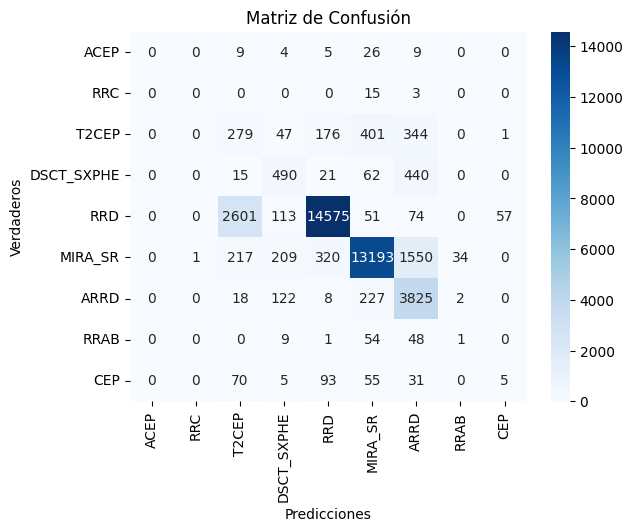

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

def evaluar_rendimiento(direccion_modelo, X_eval, y_eval, tipo_analisis='matriz_confusion'):
    """
    Evalúa el rendimiento de un modelo guardado.

    Parámetros:
    - direccion_modelo (str): Ruta donde se encuentra el modelo guardado.
    - X_eval (array-like): Datos de entrada para la evaluación.
    - y_eval (array-like): Etiquetas verdaderas para la evaluación.
    - tipo_analisis (str): Tipo de análisis ('matriz_confusion' o 'metricas').
    """
    # Cargar el modelo
    print(f"Cargando el modelo desde {direccion_modelo}...")
    modelo = joblib.load(direccion_modelo)
    
    # Realizar predicciones
    print("Realizando predicciones...")
    y_pred = modelo.predict(X_eval)
    
    # Mostrar la matriz de confusión
    if tipo_analisis == 'matriz_confusion':
        print("Mostrando la matriz de confusión...")
        matriz = confusion_matrix(y_eval, y_pred)
        sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_eval), yticklabels=set(y_eval))
        plt.title("Matriz de Confusión")
        plt.xlabel("Predicciones")
        plt.ylabel("Verdaderos")
        plt.show()
    
    # Mostrar las métricas de evaluación
    elif tipo_analisis == 'metricas':
        print("Mostrando métricas de evaluación...")
        accuracy = accuracy_score(y_eval, y_pred)
        recall = recall_score(y_eval, y_pred, average='weighted')
        precision = precision_score(y_eval, y_pred, average='weighted')
        f1 = f1_score(y_eval, y_pred, average='weighted')
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"F1-score: {f1:.4f}")
        
        # Mostrar un informe detallado
        report = classification_report(y_eval, y_pred)
        print("\nReporte de Clasificación:\n", report)
    else:
        raise ValueError("El tipo de análisis debe ser 'matriz_confusion' o 'metricas'.")

# Ejemplo de uso:
evaluar_rendimiento('naive_bayes.pkl', X_test, y_test, tipo_analisis='matriz_confusion')
#evaluar_rendimiento('logistic_regression.pkl', X_test, y_test, tipo_analisis='matriz_confusion')


Funciones para probar distintos modelos, con los siguientes argumentos en la regresión logística: penalty, C, class weight, l1 ratio. Además se prueba Naive Bayes modificando priors.


In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Función para entrenar Naive Bayes con diferentes priors
def probar_naive_bayes(X_train, y_train, X_test, y_test, priors=None):
    print(f"Probando Naive Bayes con priors: {priors}")
    modelo = GaussianNB(priors=priors)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    print("Métricas:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Función para probar Regresión Logística con diferentes parámetros
def probar_regresion_logistica(X_train, y_train, X_test, y_test, penalty='l2', C=1.0, class_weight=None, l1_ratio=None):
    print(f"Probando Regresión Logística con penalty: {penalty}, C: {C}, class_weight: {class_weight}, l1_ratio: {l1_ratio}")
    modelo = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight, l1_ratio=l1_ratio, solver='saga', max_iter=1000)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    print("Métricas:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Selección de características con RFE
def seleccion_descriptores(X, y, modelo, n_features):
    selector = RFE(estimator=modelo, n_features_to_select=n_features)
    selector = selector.fit(X, y)
    print("Características seleccionadas:")
    print(X.columns[selector.support_])
    return X.loc[:, selector.support_]

# Ejemplo de pruebas con Naive Bayes
probar_naive_bayes(X_train, y_train, X_test, y_test, priors=None)
probar_naive_bayes(X_train, y_train, X_test, y_test, priors=[0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])  # Priors personalizados

# Ejemplo de pruebas con Regresión Logística
probar_regresion_logistica(X_train, y_train, X_test, y_test, penalty='l2', C=1.0, class_weight='balanced')
probar_regresion_logistica(X_train, y_train, X_test, y_test, penalty='elasticnet', C=0.5, class_weight=None, l1_ratio=0.5)

# Ejemplo de selección de descriptores
modelo_rl = LogisticRegression(max_iter=1000)
X_train_selected = seleccion_descriptores(X_train, y_train, modelo_rl, n_features=3)


Probando Naive Bayes con priors: None
Métricas:
Accuracy: 0.8109


c:\Users\ignac\Documents\Ambientes Virtuales\dataAnalisis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.8637
Recall: 0.8109
F1-score: 0.8302
Probando Naive Bayes con priors: [0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Métricas:
Accuracy: 0.4896
Precision: 0.8825
Recall: 0.4896
F1-score: 0.5826
Probando Regresión Logística con penalty: l2, C: 1.0, class_weight: balanced, l1_ratio: None
Métricas:
Accuracy: 0.6481
Precision: 0.8892
Recall: 0.6481
F1-score: 0.7425
Probando Regresión Logística con penalty: elasticnet, C: 0.5, class_weight: None, l1_ratio: 0.5
Métricas:
Accuracy: 0.8825


c:\Users\ignac\Documents\Ambientes Virtuales\dataAnalisis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.8525
Recall: 0.8825
F1-score: 0.8633
Características seleccionadas:
Index(['Amplitude', 'Meanvariance', 'SmallKurtosis'], dtype='object')
